In [0]:
from sklearn.datasets import load_iris
import pandas as pd

In [0]:
iris= load_iris() # irisデータ取得
X = iris.data     # 説明変数(クラス推定用変数)
Y = iris.target   # 目的変数(クラス値)

In [0]:
iris_data = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_target = pd.DataFrame(Y, columns=['Species'])

In [0]:
# iris_targetが0〜2の値で分かりづらいので、あやめの名前に変換
def flower(num):
#"""名前変換用関数"""
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

In [0]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [0]:
iris = pd.concat([iris_data, iris_target], axis=1)

In [0]:
grouped = iris.groupby('Species')

In [15]:
grouped.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Veriscolour
51,6.4,3.2,4.5,1.5,Veriscolour
52,6.9,3.1,4.9,1.5,Veriscolour
53,5.5,2.3,4.0,1.3,Veriscolour
54,6.5,2.8,4.6,1.5,Veriscolour


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

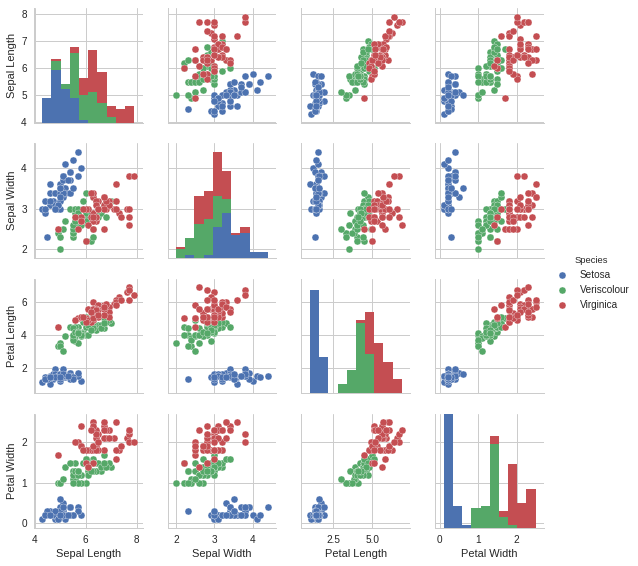

In [10]:
sns.pairplot(iris, hue = 'Species', size =2) # hue:指定したデータで分割

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split # trainとtest分割用

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
# train用とtest用のデータ用意。test_sizeでテスト用データの割合を指定。random_stateはseed値を適当にセット。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=3)

array([[5. , 3.6, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.8, 3.2, 5.9, 2.3],
       [5.9, 3.2, 4.8, 1.8],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.4, 3.1, 5.5, 1.8],
       [6.3, 3.3, 6. , 2.5],
       [4.9, 3.1, 1.5, 0.1],
       [6.7, 3.3, 5.7, 2.1],
       [5.7, 3. , 4.2, 1.2],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [7.7, 3.8, 6.7, 2.2],
       [5.8, 2.8, 5.1, 2.4],
       [5.7, 2.8, 4.1, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [6.3, 2.3, 4.4, 1.3],
       [5.1, 3.8, 1.9, 0.4],
       [5.5, 3.5, 1.3, 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.9, 3.1, 4.9, 1.5],
       [7.1, 3. , 5.9, 2.1],
       [5.9, 3. , 4.2, 1.5],
       [7.7, 2.8, 6.7, 2. ],
       [4.8, 3.1, 1.6, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [4.3, 3. , 1.1, 0.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.4, 2.8, 5.6, 2.2],
       [6.2, 3

In [0]:
knn = KNeighborsClassifier(n_neighbors=6) # インスタンス生成。n_neighbors:Kの数

In [13]:
knn.fit(X_train, Y_train)                 # モデル作成実行

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [0]:
Y_pred = knn.predict(X_test)              # 予測実行

In [0]:
# 精度確認用のライブラリインポートと実行
from sklearn import metrics

In [16]:
metrics.accuracy_score(Y_test, Y_pred)    # 予測精度計測

0.95